PDC Performance
==

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## PDC 2020 Performance Analysis
>  Includes the performance analysis for the PDC 2020 event logs.

In [ ]:
from fastai.basics import *
from pympp.process import *
from pympp.anomaly.detect import *
from pympp.anomaly.heuristics import *
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import seaborn as sns

In [ ]:
get_preds??

In [ ]:
def get_th_df(ths,score_df,y_true,log_name,f_score=f_score):
    res = []
    for t in ths:
        y_pred=get_preds(score_df,t,)
        anomaly_ratio = sum(x == 1 for x in y_pred) / len(y_pred)
        f1 = f_score(y_true, y_pred)
        precision = precision_score(y_true,y_pred)
        recall = recall_score(y_true,y_pred)
        res.append([log_name, f1, precision, recall, anomaly_ratio])

    columns='Log Name', 'F1 Score','Precision','Recall', 'Anomaly Ratio'
    th_df = pd.DataFrame(res,columns=columns,index=ths)
    return th_df

In [ ]:
get_score_df??

In [ ]:
pdc_year=2020
heuristics = [get_best_threshhold,partial(get_ratio_th,0.5),elbow_heuristic,
              partial(get_fixed_heuristic,0.98),get_lowest_plateau_heuristic]
heuristic_names = ['best','r_0.5','e_down','e_up','fix','lp_min','lp_mean','lp_max']
res = []
for fn in progress_bar(glob.glob(f'../data/logs/csv/dapnn_ds/PDC{pdc_year}_training/*')):
    log_name = Path(fn).stem[9:-4]
    score_df,y_true = get_score_df(log_name)
    ths = np.array((range(100)))*0.001 +0.9
    th_df = get_th_df(ths,score_df,y_true,log_name)

    heuristic_scores_f1 =[i['F1 Score'] for j in [listify(x(th_df)) for x in heuristics] for i in j]
    res.append([log_name,*heuristic_scores_f1])

pdc20_df =pd.DataFrame(res,columns=['Log']+heuristic_names)
pdc20_df

,Log,best,r_0.5,e_down,e_up,fix,lp_min,lp_mean,lp_max
0,1001001,0.953093,0.953093,0.798393,0.657110,0.932661,0.932661,0.932661,0.932661
1,0111100,0.931330,0.927409,0.905769,0.911830,0.924422,0.928373,0.928373,0.928373
2,0000011,0.937942,0.935014,0.924592,0.589858,0.898103,0.898103,0.898103,0.898103
3,1000010,0.961497,0.952000,0.894637,0.874865,0.960699,0.949232,0.949232,0.949232
4,0201010,0.812929,0.812929,0.806868,0.792289,0.692971,0.709982,0.709982,0.711552
...,...,...,...,...,...,...,...,...,...
187,1200101,0.802969,0.802969,0.802969,0.775232,0.719553,0.703018,0.703018,0.703018
188,0111001,0.917743,0.893800,0.866523,0.714097,0.916810,0.916000,0.916000,0.916000
189,0110111,0.877301,0.874412,0.873815,0.747505,0.869146,0.873815,0.873815,0.873815
190,1210101,0.856760,0.822154,0.836382,0.797863,0.845096,0.850585,0.849805,0.851043


In [ ]:
pdc20_df=pdc20_df.sort_values(['best'])

In [ ]:
means=pdc20_df[list(pdc20_df)[1:]].mean()
mean_f1_score=means[1]
means

best       0.891134
r_0.5      0.878399
e_down     0.832037
e_up       0.777214
fix        0.861649
lp_min     0.861107
lp_mean    0.861229
lp_max     0.861314
dtype: float64

<matplotlib.legend.Legend>

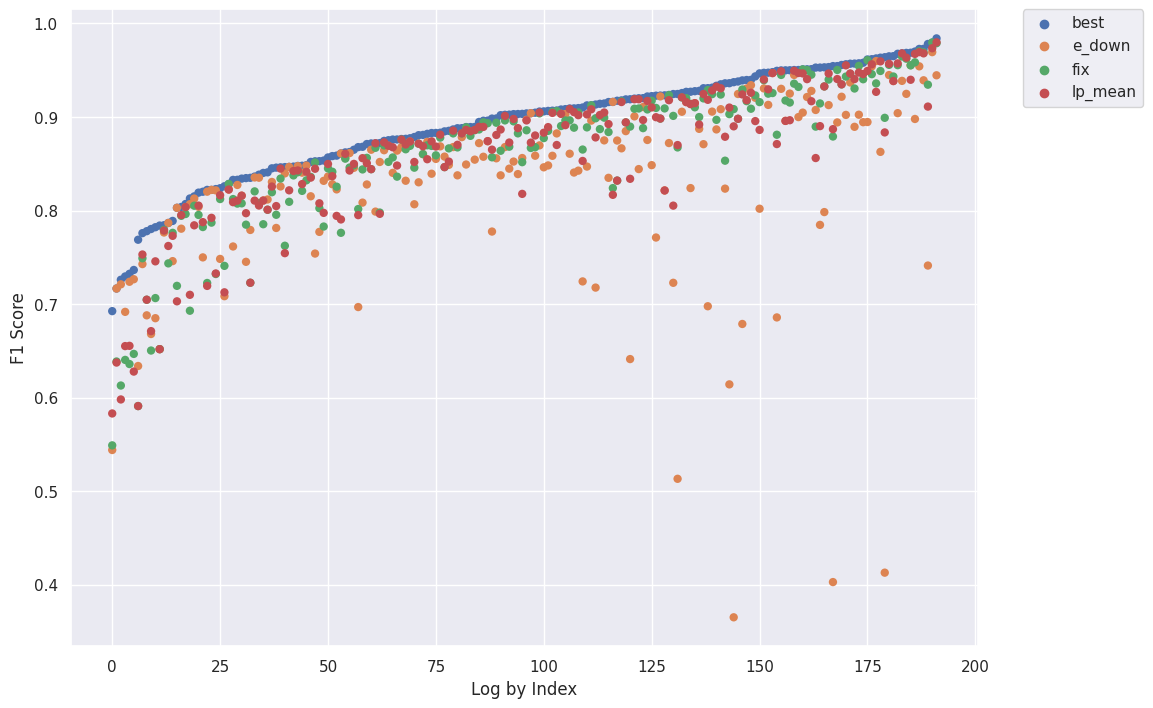

In [ ]:
def get_plot_data(th_df,id_vars=['Log Name'],value_vars = ['F1 Score','Anomaly Ratio']):
    plot_data=th_df.melt(var_name='Heuristic',value_name='Score',id_vars =id_vars ,value_vars=value_vars,ignore_index=False)
    plot_data['Threshold']=plot_data.index
    plot_data.index=range(len(plot_data))
    return plot_data

plot_data = get_plot_data(pdc20_df,id_vars=['Log'],value_vars=['best',
 'e_down',
 'fix',
 'lp_mean',
])


log2int = {j:i for i,j in enumerate(pdc20_df['Log'].unique())}
plot_data ['Log by Index']= plot_data['Log'].map(log2int)
plot_data ['F1 Score']=plot_data ['Score']

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data =plot_data, x='Log by Index',y='F1 Score', hue='Heuristic' ,linewidth=0,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Compare with existing approaches

This image is from the PDC 2020 website:

![Image of Yaktocat](https://icpmconference.org/2020/wp-content/uploads/sites/4/2020/03/F-score-PDC-2020.png)


We copy over the results from the existing approaches from the graphic and enter the score of our DAPNN approach:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
plt.style.use('ggplot')


Text(0, 0.5, '')

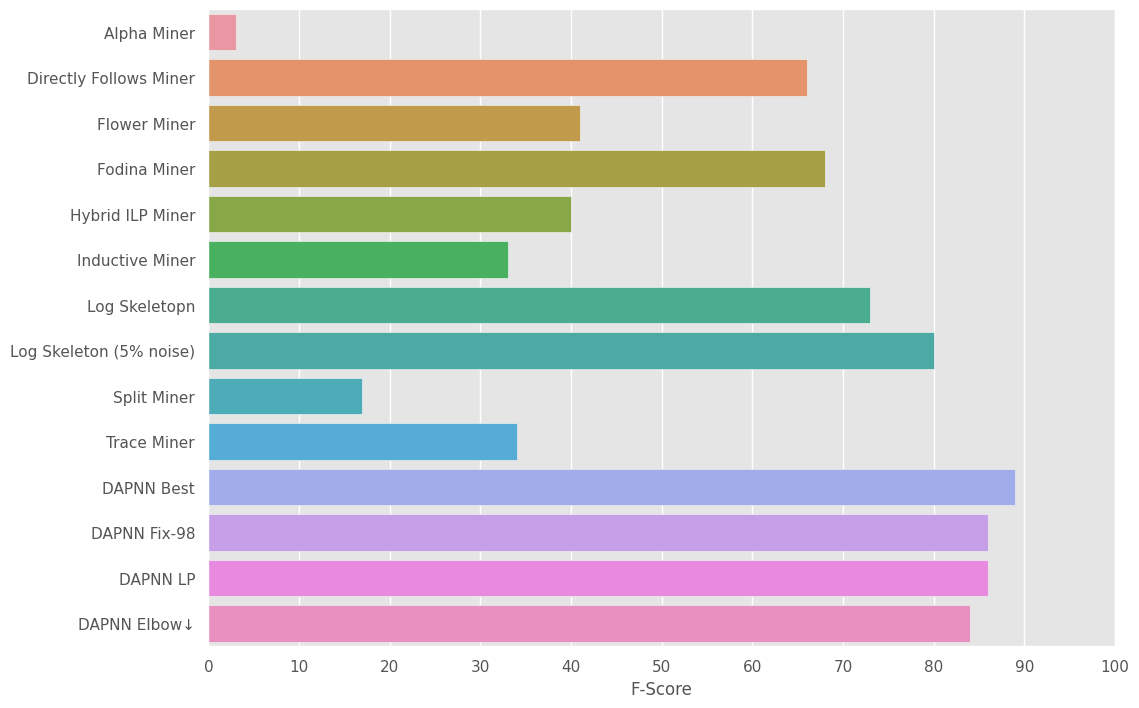

In [ ]:

cols= ['Method','F1 Score']

data =[
    ['Alpha Miner',0.03],
    ['Directly Follows Miner',0.66],
    ['Flower Miner',0.41],
    ['Fodina Miner',0.68],
    ['Hybrid ILP Miner',0.4],
    ['Inductive Miner',0.33],
    ['Log Skeletopn',0.73],
    ['Log Skeleton (5% noise)',0.8],
    ['Split Miner',0.17],
    ['Trace Miner',0.34],
    ['DAPNN Best',0.89],
    ['DAPNN Fix-98',0.86],
    ['DAPNN LP',0.86],
    ['DAPNN Elbow↓',0.84],


]
df=pd.DataFrame(data,columns=cols)
df['F-Score']=df['F1 Score']*100

# add the plot



ax=sns.barplot(x='F-Score',y='Method',data=df)
# add the annotation
ax.set_xlim(0,100)
ax.set_xticks(range(0,110,10))
ax.set_ylabel("")


## PDC 2021 Performance Analysis
>  Includes the performance analysis for the PDC 2021 event logs.

### Compute


In [ ]:
def get_score_df(log_name,prediction_normalization = True):
    learner_path=f'../models/pdc2021'
    training_log_path = f'../data/logs/csv/dapnn_ds/PDC2021_training/pdc2021_{log_name}.csv.gz'
    test_log_path = f'../data/logs/csv/dapnn_ds/PDC2021_ground_truth/pdc2021_{log_name[:-1]}.csv.gz' 
    
    cols = ['activity']
    m, categorify= load_pred_model(learner_path,training_log_path,f"pdc2021_{log_name}")
    if type(test_log_path)==str:
        log = import_log_pdc(test_log_path)
    else:
        log = test_log_path   
    o = process_test(log,categorify,cols)
    nsp,idx=predict_next_step(o,m)
    score_df=multivariate_anomaly_score(nsp,o,idx,cols,prediction_normalization)
    y_true =o.items['normal'].astype(float).groupby(o.items.index).mean().to_numpy() ==False
    return score_df, y_true

In [ ]:
pdc_year=2021
heuristics = [get_best_threshhold,partial(get_ratio_th,0.5),elbow_heuristic,
              partial(get_fixed_heuristic,0.98),get_lowest_plateau_heuristic]
heuristic_names = ['best','r_0.5','e_down','e_up','fix','lp_min','lp_mean','lp_max']
res = []
for fn in progress_bar(glob.glob(f'../data/logs/csv/dapnn_ds/PDC{pdc_year}_training/*')):
    log_name = Path(fn).stem[8:-4]
    score_df,y_true = get_score_df(log_name)
    ths = np.array((range(100)))*0.001 +0.9
    th_df = get_th_df(ths,score_df,y_true,log_name)

    heuristic_scores_f1 =[i['F1 Score'] for j in [listify(x(th_df)) for x in heuristics] for i in j]
    res.append([log_name,*heuristic_scores_f1])

pdc21_df =pd.DataFrame(res,columns=['Log']+heuristic_names)
pdc21_df

,Log,best,r_0.5,e_down,e_up,fix,lp_min,lp_mean,lp_max
0,0010011,0.971193,0.947983,0.786408,0.971193,0.853211,0.971193,0.971193,0.971193
1,0200003,1.000000,1.000000,0.983740,0.983740,1.000000,0.991935,0.991935,0.991935
2,1001114,0.987854,0.987854,0.983740,0.966942,0.983740,0.975410,0.975410,0.975410
3,1110100,0.979853,0.963983,0.879279,0.867709,0.890214,0.934906,0.934906,0.934906
4,0100113,1.000000,1.000000,0.949580,0.949580,0.991935,0.949580,0.949580,0.949580
...,...,...,...,...,...,...,...,...,...
475,1001014,0.995984,0.995984,0.995984,0.975738,0.995984,0.991935,0.991935,0.991935
476,1100110,0.971588,0.971588,0.963187,0.971588,0.963187,0.966942,0.966942,0.966942
477,1000004,1.000000,1.000000,0.983740,0.966942,1.000000,1.000000,1.000000,1.000000
478,0010101,1.000000,1.000000,0.962656,0.949580,0.962656,0.995984,0.995984,0.995984


In [ ]:
means=pdc21_df[list(pdc21_df)[1:]].mean()
mean_f1_score=means[1]
means

best       0.980649
r_0.5      0.973581
e_down     0.930354
e_up       0.925034
fix        0.949955
lp_min     0.965082
lp_mean    0.965082
lp_max     0.965082
dtype: float64

<matplotlib.legend.Legend>

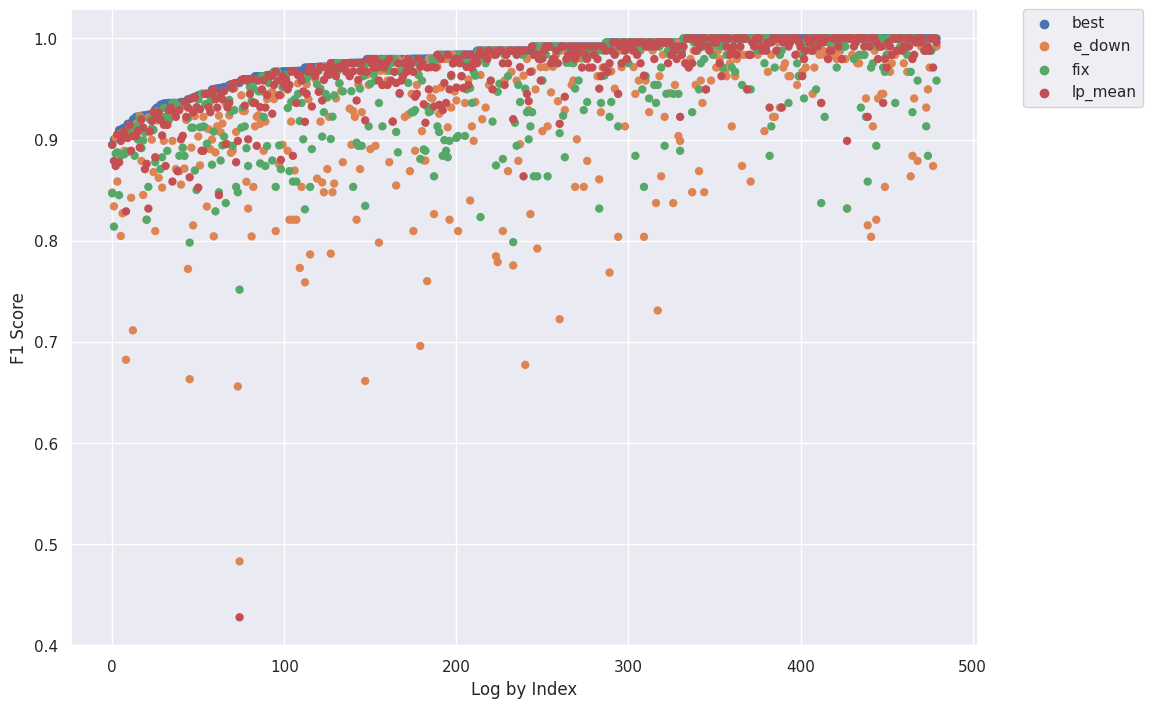

In [ ]:
pdc21_df =pdc21_df.sort_values('best')

def get_plot_data(th_df,id_vars=['Log Name'],value_vars = ['F1 Score','Anomaly Ratio']):
    plot_data=th_df.melt(var_name='Heuristic',value_name='Score',id_vars =id_vars ,value_vars=value_vars,ignore_index=False)
    plot_data['Threshold']=plot_data.index
    plot_data.index=range(len(plot_data))
    return plot_data

plot_data = get_plot_data(pdc21_df,id_vars=['Log'],value_vars=['best',
 'e_down',
 'fix',
 'lp_mean',
])


log2int = {j:i for i,j in enumerate(pdc21_df['Log'].unique())}
plot_data ['Log by Index']= plot_data['Log'].map(log2int)
plot_data ['F1 Score']=plot_data ['Score']

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data =plot_data, x='Log by Index',y='F1 Score', hue='Heuristic' ,linewidth=0,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Compare with existing approaches

This image is from the PDC 2021 website:

![Image of Yaktocat](https://icpmconference.org/2021/wp-content/uploads/sites/5/2021/04/F-score-Overview.png)


We copy over the results from the existing approaches from the graphic and enter the score of our DAPNN approach:

Text(0, 0.5, '')

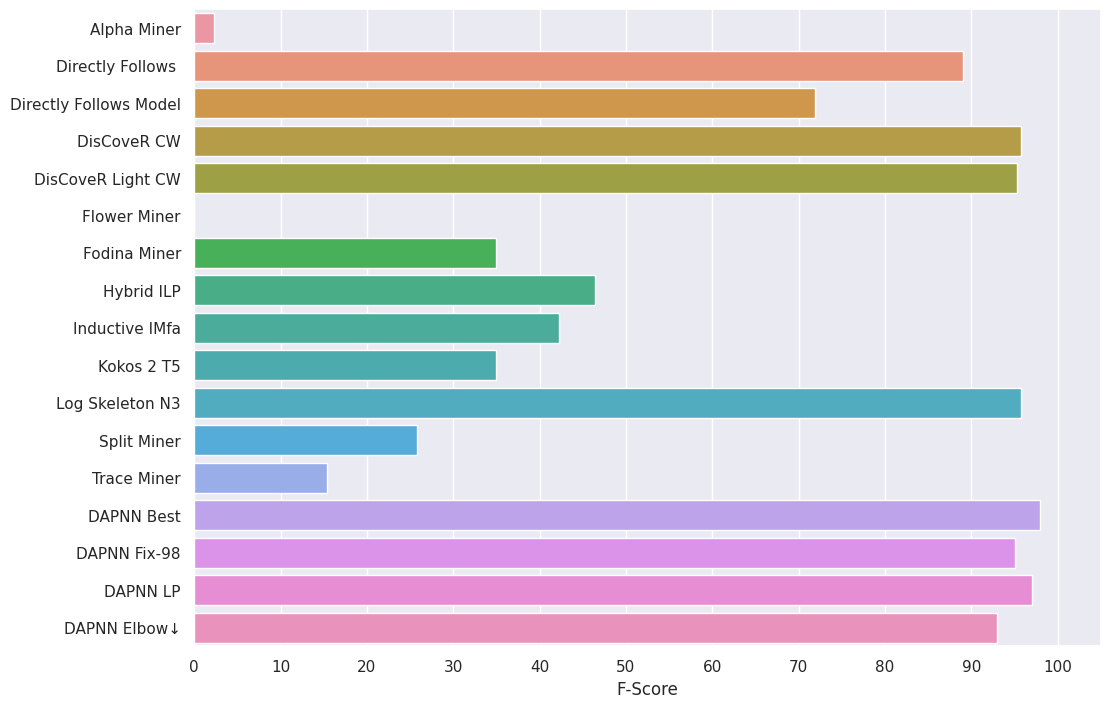

In [ ]:


cols= ['Method','F1 Score']

data =[
    ['Alpha Miner',0.023],
    ['Directly Follows ',0.89],
    ['Directly Follows Model',0.719],
        ['DisCoveR CW',0.958],
    ['DisCoveR Light CW',0.953],
    ['Flower Miner',0],
    ['Fodina Miner',0.35],
    ['Hybrid ILP',0.464],
    ['Inductive IMfa',0.423],
    ['Kokos 2 T5',0.349],
    ['Log Skeleton N3',0.957],
        ['Split Miner',0.258],

    ['Trace Miner',0.154],

    ['DAPNN Best',0.98],
    ['DAPNN Fix-98',0.95],
    ['DAPNN LP',0.97],
    ['DAPNN Elbow↓',0.93],

    
]
df=pd.DataFrame(data,columns=cols)
df['F-Score']=df['F1 Score']*100

# add the plot



ax=sns.barplot(x='F-Score',y='Method',data=df)
# add the annotation
ax.set_xlim(0,105)
ax.set_xticks(range(0,110,10))
ax.set_ylabel("")
#ax.bar_label(ax.containers[-1], fmt='%.0f%%', label_type='edge');